In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import glob
import os

from scipy.stats import trim_mean
from statsmodels import robust
from matplotlib import font_manager, rc
%matplotlib inline
from matplotlib import cm 

%matplotlib inline

# 한글 폰트 설정
import platform
your_os = platform.system()
if your_os == 'Linux':
    rc('font', family='NanumGothic')
elif your_os == 'Windows':
    ttf = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=ttf).get_name()
    rc('font', family=font_name)
elif your_os == 'Darwin':
    rc('font', family='AppleGothic')
rc('axes', unicode_minus=False)

In [2]:
input_file = r'C:\Users\ghdwl\OneDrive\바탕 화면\날씨 콘테스트\data' 

all_file_list = glob.glob(os.path.join(input_file, 'buy*'))
all_data = [] 

for file in all_file_list:
    df = pd.read_csv(file) 
    df.columns = ['num','data','sex','age','big_cat','sm_cat','qty']
    all_data.append(df)
    
buy_data = pd.concat(all_data, axis=0, ignore_index=True)


In [3]:
buy_data['year'] = buy_data['data'].astype('str').astype('datetime64').dt.year
buy_data['month'] = buy_data['data'].astype('str').astype('datetime64').dt.month
buy_data['day'] = buy_data['data'].astype('str').astype('datetime64').dt.day
buy_data['Day_of_week'] = (buy_data['data'].astype('str').astype('datetime64').
                           apply(lambda x: ('월','화','수','목','금','토','일')[x.weekday()]))
buy_data.head()

,num,data,sex,age,big_cat,sm_cat,qty,year,month,day,Day_of_week
0,1,20180101,F,20,식품,가공란,37.0,2018,1,1,월
1,2,20180101,F,30,식품,가공란,16.0,2018,1,1,월
2,3,20180101,F,40,식품,가공란,9.0,2018,1,1,월
3,4,20180101,F,50,식품,가공란,3.0,2018,1,1,월
4,5,20180101,M,20,식품,가공란,13.0,2018,1,1,월


# 대분류 상품 구매비율

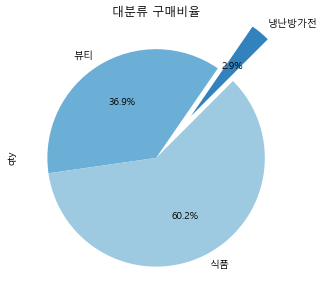

In [7]:
colors1 = matplotlib.cm.get_cmap('tab20c')(np.arange(3))
plt.figure(figsize = (5,5))
(buy_data.groupby(['big_cat'])['qty'].sum()/1e7).plot.pie(autopct = "%.1f%%",  startangle = 45, colors = colors1, explode = (0.5,0, 0))
plt.title("대분류 구매비율")
plt.show()

# 대분류 구매성별 구매량/비율

Text(0, 0.5, '구매건수')

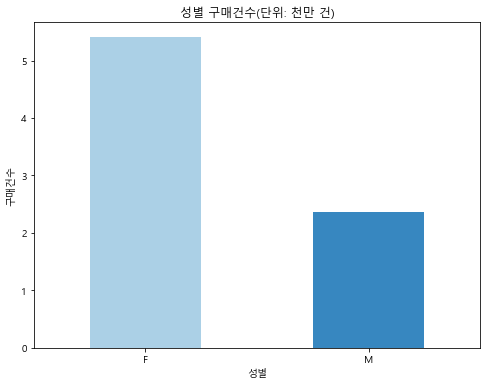

In [43]:
big_sex_pivot = buy_data.pivot_table(index='big_cat',columns='sex',values='qty', aggfunc='sum',margins=True)

plt.figure(figsize = (8,6))
colors1 = sns.color_palette("Blues", n_colors=2)
(big_sex_pivot.iloc[-1,:-1]/ 1e7).plot.bar(color = colors1, rot = 0)
plt.title("성별 구매건수(단위: 천만 건)")
plt.xlabel('성별')
plt.ylabel('구매건수')

C:\Users\ghdwl\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


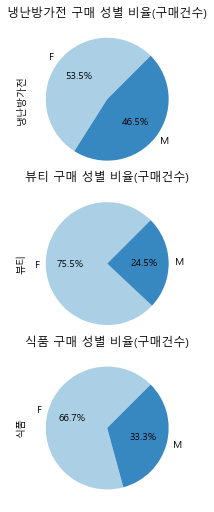

In [28]:
fig, axes = plt.subplots(3,1, figsize = (10,7))
colors1 = sns.color_palette("Blues", n_colors=2)
big_sex_pivot = buy_data.pivot_table(index='big_cat',columns='sex',values='qty', aggfunc='sum',margins=True)
big_sex_pivot.iloc[0,:-1].plot.pie(autopct = "%.1f%%",  startangle = 45, colors = colors1, ax=axes[0])
big_sex_pivot.iloc[1,:-1].plot.pie(autopct = "%.1f%%",  startangle = 45, colors = colors1, ax=axes[1])
big_sex_pivot.iloc[2,:-1].plot.pie(autopct = "%.1f%%",  startangle = 45, colors = colors1, ax=axes[2])

plt.tight_layout()

axes[0].set_title("냉난방가전 구매 성별 비율(구매건수)")
axes[1].set_title("뷰티 구매 성별 비율(구매건수)")
axes[2].set_title("식품 구매 성별 비율(구매건수)")

plt.show()

# 나이별 대분류 구매비율

In [13]:
big_age_pivot = buy_data.pivot_table(index='big_cat',columns='age',values='qty', aggfunc='sum',margins=True)

In [26]:
colors = sns.color_palette("Blues", n_colors=3)

<Figure size 864x864 with 0 Axes>

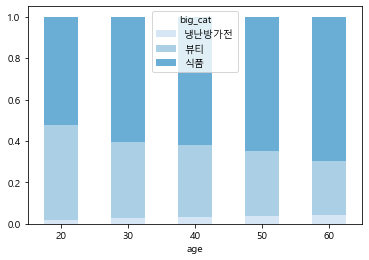

In [39]:
plt.figure(figsize = (12,12))
big_ratio = big_age_pivot.divide(big_age_pivot.loc['All', :], axis = 1).iloc[:-1, :-1]
big_ratio.T.plot.bar(stacked = True, rot = 0,color=colors)
#plt.title('나이별 대분류 구매비율')
plt.show()

# 나이별 (대분류) 구매건수

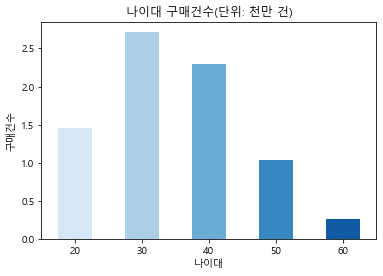

In [30]:
sex_age_pivot = pd.pivot_table(buy_data, index= 'age', columns = 'sex', values = 'qty', aggfunc = 'sum', margins = True)

colors = sns.color_palette("Blues", n_colors=5)
(sex_age_pivot.iloc[:-1,-1]/ 1e7).plot.bar(color = colors, rot = 0)
plt.title("나이대 구매건수(단위: 천만 건)")
plt.xlabel('나이대')
plt.ylabel('구매건수')
plt.show()

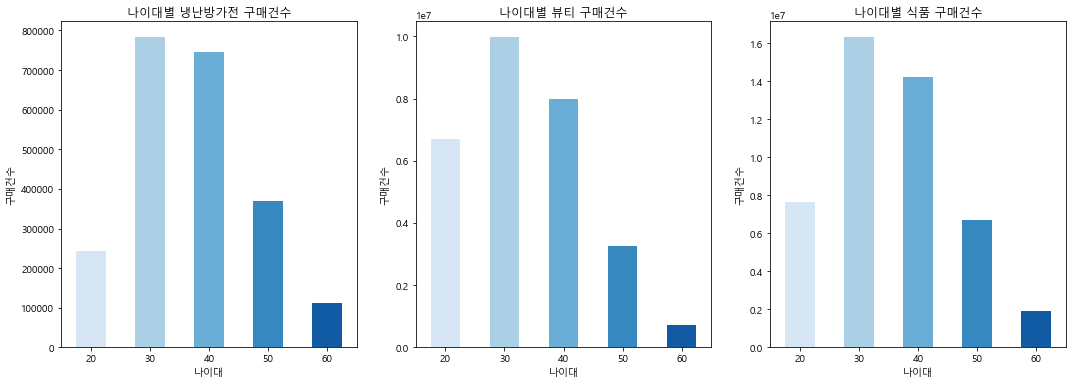

In [45]:
big_cat_by_age = pd.pivot_table(buy_data, index= 'age', columns = 'big_cat', values = 'qty', aggfunc = 'sum',margins = True)
colors = sns.color_palette("Blues", n_colors=5)

fig, axes = plt.subplots(1,3, figsize = (18,6))

for i in range(3):
    big_cat_by_age.iloc[:-1,i].plot.bar(ax = axes[i], color = colors,rot = 0)
    axes[i].set_title('나이대별 {} 구매건수'.format(big_cat_by_age.iloc[:-1,i].name))
    axes[i].set_xlabel('나이대')
    axes[i].set_ylabel('구매건수')
    #axes[i].set_ylim(0, 8500000)